<a href="https://colab.research.google.com/github/itsHariom09/AIML_Project/blob/main/MedicalInsurancecost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
# Load the dataset
file_path = "/content/drive/MyDrive/Machine Learning Self/Datasets/insurance.csv"
df = pd.read_csv(file_path)

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


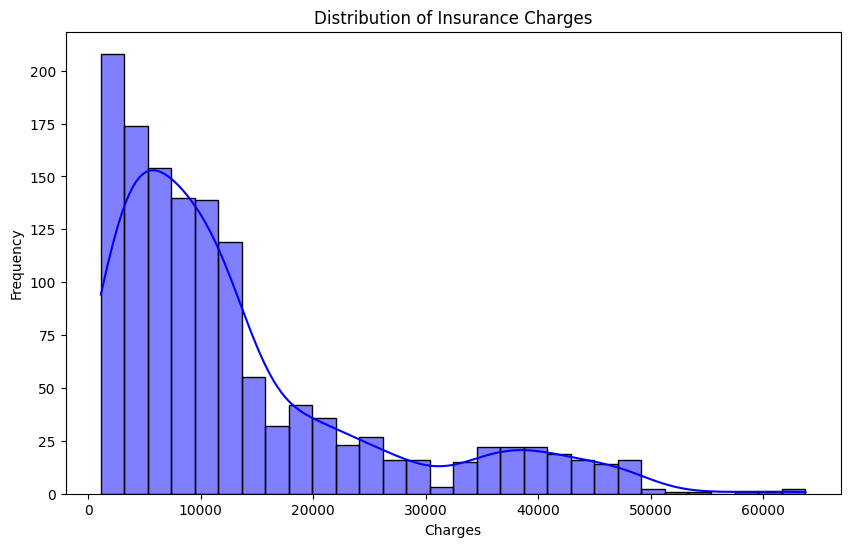

In [9]:
# Data visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True, color='blue')
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

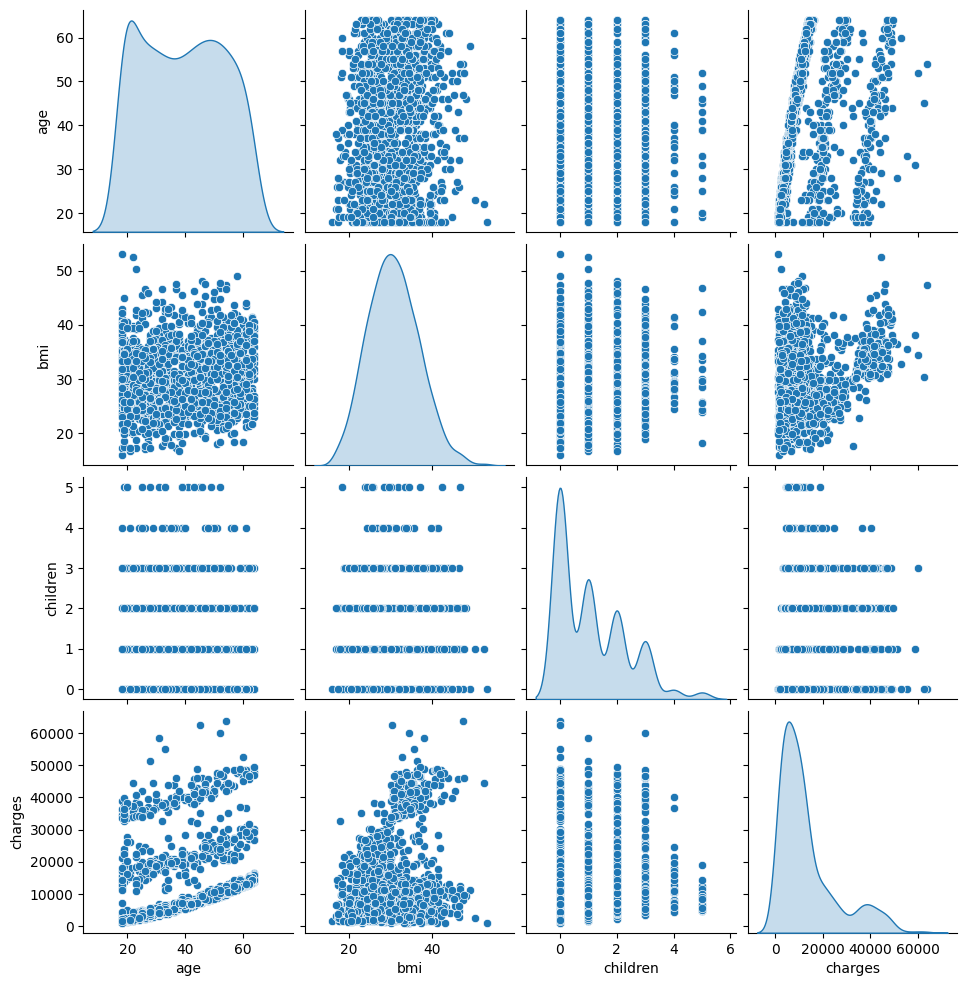

In [10]:
# Pairplot to check relationships
sns.pairplot(df, diag_kind='kde')
plt.show()

In [11]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

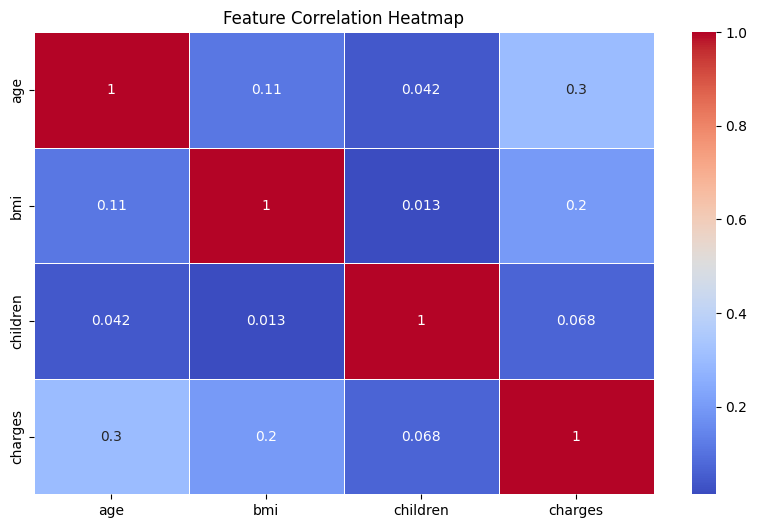

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [13]:
# Define features and target variable
X = df.drop(columns=['charges'])  # Independent variables
y = df['charges']  # Target variable

In [14]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standardize numerical features
scaler = StandardScaler()
X_train[['age', 'bmi', 'children']] = scaler.fit_transform(X_train[['age', 'bmi', 'children']])
X_test[['age', 'bmi', 'children']] = scaler.transform(X_test[['age', 'bmi', 'children']])

In [16]:
# Ensure X_train is a NumPy array of float type
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [17]:
# Train a Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=42)

In [18]:
# Make predictions
y_pred_gb = gb_model.predict(X_test)

In [19]:
# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)  # R-squared score

In [20]:
# Adjusted R-squared calculation
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
adj_r2_gb = 1 - (1 - r2_gb) * (n - 1) / (n - p - 1)

In [21]:
# P-values calculation using OLS regression
X_train_const = sm.add_constant(X_train)  # Adding constant term for intercept
ols_model = sm.OLS(y_train, X_train_const.astype(float)).fit()
p_values = ols_model.pvalues

In [22]:
print(f"Gradient Boosting Regression Results:\nMAE: {mae_gb:.2f}\nMSE: {mse_gb:.2f}\nRMSE: {rmse_gb:.2f}\nR2 Score: {r2_gb:.4f}\nAdjusted R2 Score: {adj_r2_gb:.4f}")
print("P-values:")
print(p_values)

Gradient Boosting Regression Results:
MAE: 2664.22
MSE: 22805812.42
RMSE: 4775.54
R2 Score: 0.8531
Adjusted R2 Score: 0.8486
P-values:
const                1.065935e-79
age                  6.310917e-70
bmi                  4.109401e-24
children             6.063516e-03
sex_male             9.605915e-01
smoker_yes          9.774475e-286
region_northwest     4.900699e-01
region_southeast     2.232140e-01
region_southwest     1.305634e-01
dtype: float64


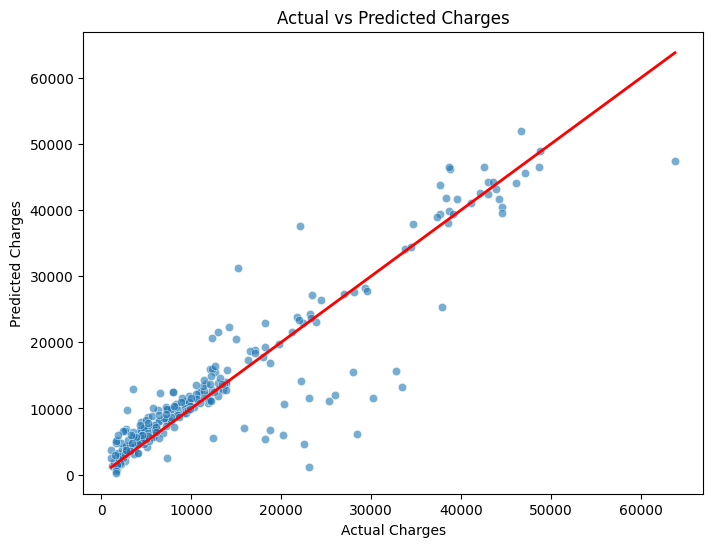

In [23]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()

In [30]:
# Function to take user input and predict insurance charges
def predict_charges():
    print("Enter user details:")
    age = float(input("Age: "))
    bmi = float(input("BMI: "))
    children = int(input("Number of children: "))
    sex = input("Sex (male/female): ").lower()
    smoker = input("Smoker (yes/no): ").lower()
    region = input("Region (southwest/southeast/northwest/northeast): ").lower()

    # Encoding categorical inputs
    sex_male = 1 if sex == 'male' else 0
    smoker_yes = 1 if smoker == 'yes' else 0
    region_sw, region_se, region_nw = 0, 0, 0
    if region == 'southwest':
        region_sw = 1
    elif region == 'southeast':
        region_se = 1
    elif region == 'northwest':
        region_nw = 1

    # Standardizing numerical features
    age_scaled, bmi_scaled, children_scaled = scaler.transform([[age, bmi, children]])[0]

    # Creating input array
    user_data = np.array([[age_scaled, bmi_scaled, children_scaled, sex_male, smoker_yes, region_sw, region_se, region_nw]])

    # Predicting charges
    predicted_charge = gb_model.predict(user_data)[0]
    print(f"Predicted Insurance Charges: ${predicted_charge:.2f}")

# predict_charges()